In [3]:
import chardet
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
from pipeline_script import standardize_text
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

['/home/student11/ds/NLP/label_encoder.pkl']

1/1 [==============================] - 0s 110ms/step

🧠 Predicted label: The gioi

📊 Raw prediction probabilities:
 0 | Chinh tri Xa hoi     | 0.0000
 1 | Doi song             | 0.0000
 2 | Khoa hoc             | 0.0000
 3 | Kinh doanh           | 0.0000
 4 | Phap luat            | 0.0042
 5 | Suc khoe             | 0.0000
 6 | The gioi             | 0.9957
 7 | The thao             | 0.0000
 8 | Van hoa              | 0.0000
 9 | Vi tinh              | 0.0000


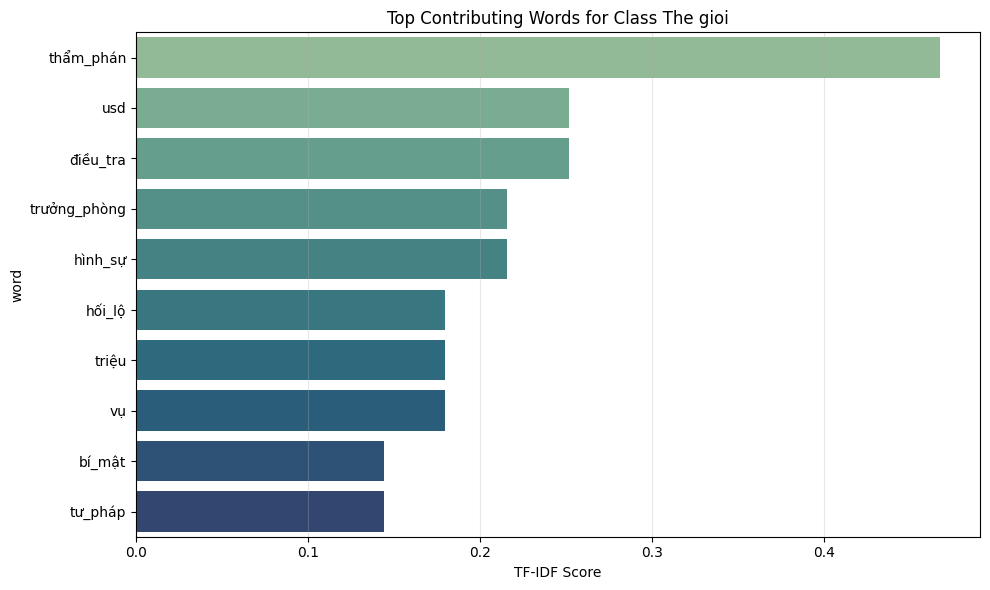

In [6]:
with open("/home/student11/ds/NLP/list_name.txt", "r", encoding="utf-8") as f:
    class_names = sorted([line.strip().replace(".txt", "") for line in f.readlines()])

encoder = joblib.load('/home/student11/ds/NLP/label_encoder.pkl')

def read_file_autoencoding(path):
    with open(path, 'rb') as f:
        raw = f.read()
    detected = chardet.detect(raw)
    return raw.decode(detected['encoding'])

def demo_function(file_path, model, cv, tfidf):
    raw_text = read_file_autoencoding(file_path)
    cleaned_text = standardize_text(raw_text)

    count_vec = cv.transform([cleaned_text])
    tfidf_vec = tfidf.transform(count_vec)

    pred_probs = model.predict(tfidf_vec)[0]
    pred_class_idx = np.argmax(pred_probs)
    pred_label = encoder.inverse_transform([pred_class_idx])[0]

    print(f"\n🧠 Predicted label: {pred_label}")
    print("\n📊 Raw prediction probabilities:")
    for i, prob in enumerate(pred_probs):
        label = encoder.inverse_transform([i])[0]
        print(f"{i:2d} | {label:<20} | {prob:.4f}")


    scores = tfidf_vec.toarray()[0]
    feature_names = cv.get_feature_names_out()
    top_indices = scores.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = scores[top_indices]

    top_df = pd.DataFrame({ "word": top_words, "score": top_scores })
    plt.figure(figsize=(10, 6))
    plt.grid(alpha=0.3)
    sns.barplot(x="score", y="word", data=top_df, palette="crest")
    plt.xlabel("TF-IDF Score")
    plt.title(f"Top Contributing Words for Class {pred_label}")
    plt.tight_layout()
    plt.show()


with open("/home/student11/ds/NLP/vectorizer.pkl", "rb") as f:
    cv, tfidf = pickle.load(f)
    
model = load_model('/home/student11/ds/NLP/models_nlp_relu/model_25_12_80_50')

demo_function("/home/student11/ds/NLP/raw-data/10-topics/Train_Full/The gioi/TG_ VNE_ (22).txt", model, cv, tfidf)